Stop words are frequently used words in a language such as "a", "the", "so" etc. (in engllish) that do not add a lot of value to certain NLP tasks. Hence it is better to remove them during pre-processing stage.



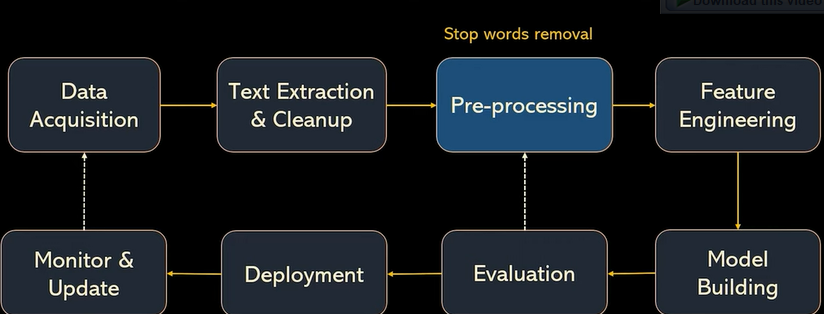

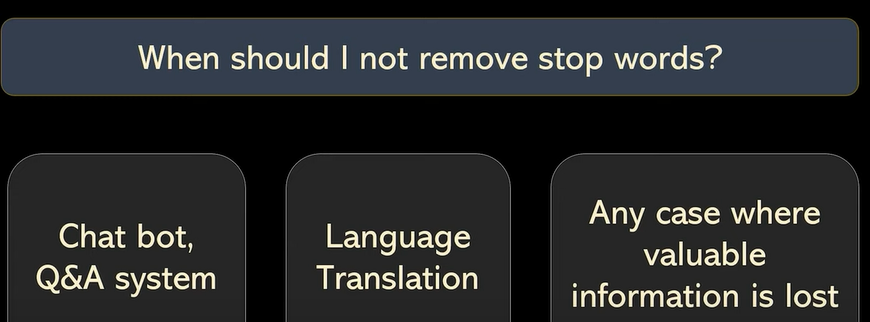

In [18]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [19]:
# total stop words
len(STOP_WORDS)

326

In [20]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("We just opened our wings, the flying part is coming soon")


#view stop words in doc
for token in doc:
  if token.is_stop:
    print(token)

We
just
our
the
part
is


In [21]:
# function for preprocessing ie. stemming, lematization, remove stop words etc
def preprocess(text):
  doc = nlp(text)

  #list comprehension
  no_stop_words = [token.text for token in doc if not token.is_stop]

  return " ".join(no_stop_words)     

In [22]:
preprocess("We just opened our wings, the flying part is coming soon")


'opened wings , flying coming soon'

excluding punctuations

In [23]:
def preprocess_(text):
  doc = nlp(text)

  #list comprehension
  no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]

  return " ".join(no_stop_words)     

In [24]:
preprocess_("We just opened our wings, the flying part is coming soon")


'opened wings flying coming soon'

In [25]:
preprocess_("The other is not other but your divine brother")

'divine brother'

In [26]:
preprocess_("Musk wants time to prepare for a trial over his")

'Musk wants time prepare trial'


Remove stop words from pandas dataframe text column

---
data from https://www.kaggle.com/datasets/jbencina/department-of-justice-20092018-press-releases?resource=download


---



In [27]:
import pandas as pd

df = pd.read_json("combined.json", lines= True)

df.shape

(13087, 6)

In [28]:
df.head(5)

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


Filter out those rows that do not have any topics associated with the case

In [29]:
df.info

<bound method DataFrame.info of             id                                              title  \
0         None       Convicted Bomb Plotter Sentenced to 30 Years   
1      12-919   $1 Million in Restitution Payments Announced t...   
2      11-1002  $1 Million Settlement Reached for Natural Reso...   
3       10-015  10 Las Vegas Men Indicted \r\nfor Falsifying V...   
4       18-898  $100 Million Settlement Will Speed Cleanup Wor...   
...        ...                                                ...   
13082   16-735  Yuengling to Upgrade Environmental Measures to...   
13083   10-473  Zarein Ahmedzay Pleads Guilty to Terror Violat...   
13084   17-045  Zimmer Biomet Holdings Inc. Agrees to Pay $17....   
13085   17-252  ZTE Corporation Agrees to Plead Guilty and Pay...   
13086   17-304  ZTE Corporation Pleads Guilty for  Violating U...   

                                                contents  \
0      PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...   
1        WASHINGTON

In [30]:
df.describe()

,id,title,contents,date,topics,components
count,12810,13087,13087,13087,13087,13087
unique,12672,12887,13080,2400,253,810
top,13-526,Northern California Real Estate Investor Agree...,"WASHINGTON – ING Bank N.V., a financial inst...",2018-04-13T00:00:00-04:00,[],[Criminal Division]
freq,3,8,2,20,8399,2680


In [33]:
 df = df[df["topics"].str.len()!=0]
 df.head(5)

,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division]
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]"


In [36]:
df.shape

(4688, 6)

In [37]:
df = df.head(100)

In [39]:
df['contents'].iloc[4]

'21st Century Oncology Inc. and certain of its subsidiaries and affiliates have agreed to pay $26 million to the government to resolve a self-disclosure relating to the submission of false attestations regarding the company’s use of electronic health records software and separate allegations that they violated the False Claims Act by submitting, or causing the submission of, claims for certain services provided pursuant to referrals from physicians with whom they had improper financial relationships. \xa0 “The Justice Department is committed to zealously investigating improper financial relationships that have the potential to compromise physicians’ medical judgment,” said Acting Assistant Attorney General Chad A. Readler of the Justice Department’s Civil Division.\xa0 “However, we will work with companies that accept responsibility for their past compliance failures and promptly take corrective action.”  \xa0 21st Century Oncology, which is headquartered in Fort Myers, Florida, owns a

In [40]:
len(df['contents'].iloc[4])

5504

In [41]:
df['contents_new'] = df['contents'].apply(preprocess)
df.head(5)

,id,title,contents,date,topics,components,contents_new
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division],"U.S. Department Justice , U.S. Environmental P..."
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division],131 - count criminal indictment unsealed today...
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U...",United States Attorney Office Middle District ...
22,15-1562,21st Century Oncology to Pay $19.75 Million to...,"21st Century Oncology LLC, has agreed to pay $...",2015-12-18T00:00:00-05:00,"[False Claims Act, Health Care Fraud]",[Civil Division],"21st Century Oncology LLC , agreed pay $ 19.75..."
23,17-1404,21st Century Oncology to Pay $26 Million to Se...,21st Century Oncology Inc. and certain of its ...,2017-12-12T00:00:00-05:00,"[Health Care Fraud, False Claims Act]","[Civil Division, USAO - Florida, Middle]",21st Century Oncology Inc. certain subsidiarie...


In [42]:
len(df['contents'].iloc[4])

5504

In [43]:
len(df['contents_new'].iloc[4])

4435

In [45]:
df['contents_new'].iloc[4][:300]

'21st Century Oncology Inc. certain subsidiaries affiliates agreed pay $ 26 million government resolve self - disclosure relating submission false attestations company use electronic health records software separate allegations violated False Claims Act submitting , causing submission , claims certai'